In [5]:
%matplotlib inline
import scipy as sc
import numpy as np
#import pandas as pd
#import matplotlib as mpl
import matplotlib.pylab as plt


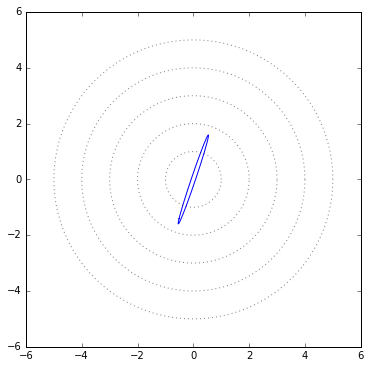

In [7]:
A = 1.5*np.mat(np.random.randn(2,2))

fig = plt.figure(figsize=(6,6))

p = 2
q = 2
X = norm_ball(p=q)
#X = np.matrix(2*np.random.rand(2,50)-1)
Y = A*X

plt.plot(Y[0,:].T, Y[1,:].T,'b-')
#plt.plot(2*Y[0,:].T, 2*Y[1,:].T,'b-')
#plt.plot(Y[0,:].T, Y[1,:].T,'b.')

for a in np.arange(1,6,1):
    X = norm_ball(p=p)
    Y = a*X

    #print(X)
    plt.plot(Y[0,:].T, Y[1,:].T,'k:',alpha=0.5)

#ax.set_xlim((-2,2))
#ax.set_ylim((-2,2))
#plt.plot(X[0,:].tolist())
ax = fig.gca()
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))
ax.axis('equal')
plt.show()   

Given a $p \geq 1$, a $p$-norm ball is the set of points 
$$
B_p = \{ x : \| x \|_p \leq 1 \}
$$
Design an algorithm to sample uniform points in a given norm-ball $B_p$, where $x \in \mathbb{R}^m$.

Let $C = AB$. Hence, $c_{i,j} = a_i^\top b_j$ where $a_i^\top$ is the $i$'th row of $A$ and $b_j$ is the $j$'th column of $B$

\begin{eqnarray}
\| A B \|_F^2 & = & \sum_{i} \sum_j |c_{i,j} |^2 \\
& = & \sum_{i} \sum_j |a^\top_{i} b_j |^2 \\
& \leq & \sum_{i} \sum_j \|a_i\|^2 \|b_j\|^2  \\
& = & \left(\sum_{i} \|a_i\|^2 \right) \left(\sum_j  \|b_j\|^2 \right)\\
& = & \| A \|_F^2 \| B \|_F^2 \\
\end{eqnarray}
Hence 
$$
\| A B \|_F \leq  \| A \|_F \| B \|_F
$$




QR for polynomials

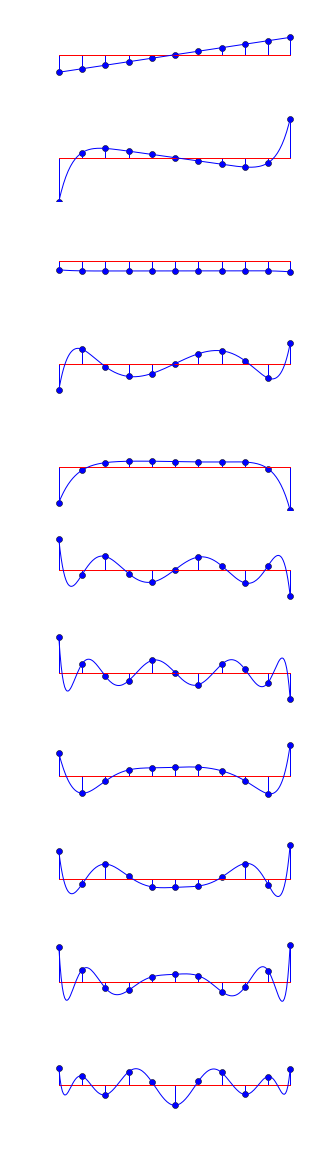

In [158]:

x = np.mat(np.arange(-1.,1.,0.01)).T
N = len(x)

degree = 10
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
B = np.hstack((np.power(x,i) for i in range(degree+1)))
B = B[:,np.random.permutation(degree+1)]
#B = np.hstack((np.power(x,i) for i in range(degree+1)))
#B = np.random.randn(N,degree+1)
A, R, = np.linalg.qr(B)
# Append an extra basis for outliers

K = A.shape[1]
plt.figure(figsize=(5,20))
#plt.show()
idx = range(0,N,20)
idx.append(N-1)
for i in range(K):
    plt.subplot(K,1,i+1)
    plt.stem(x[idx],A[idx,i])
    plt.plot(x,A[:,i])
    plt.gcf().gca().set_xlim([-1.2, 1.2])
    plt.gcf().gca().set_ylim([-0.3, 0.3])
    plt.gcf().gca().axis('off')

plt.show()

### Householder Reflection

Linearly map a vector $x$ onto the coordinate axis without changing its length.

\begin{eqnarray}
H \left(
\begin{array}{c}
x_0 \\ x_1 \\ \vdots \\ x_{N-1} 
\end{array}
\right)
=
\left(
\begin{array}{c}
\pm \|x\|  \\ 0  \\ \vdots \\ 0   
\end{array}
\right) 
\end{eqnarray}



A reflector is like a projection onto some hyperplane but we go twice further. 
$$
H = I - 2P
$$
The projection is onto the hyperplane orthogonal to $v$
$$
P = I - \frac{v}{\|v\|} \frac{v^\top}{\|v\|} = I - \frac{v v^\top}{v^\top v}
$$
where, $v$ is the difference vector 
$
v = \|x\|e_1 - x
$. 

$$
H = I - 2I + 2qq' = -I + 2qq' = -(I - 2qq')
$$


If $P$ is an orthogonal projector, the reflector $I-2P$ is an orthonormal transformation as we have $P^\top P = P^2 = P$ for an orthogonal projector.
$(I-2P)^\top (I-2P) = I - 2P^\top -2P + 4P^\top P = I$



In [161]:
import numpy as np
import numpy.linalg as la

np.set_printoptions(precision=3, suppress=True)

def house(x):
    '''Householder Reflection'''
    m = len(x)
    e = np.mat(np.zeros((m,1)))
    e[0] = 1
    v = la.norm(x)*e - x
    z = v/la.norm(v)
    H = np.eye(m) - 2*z*z.T
    return z,H

x = np.mat('[1;2;3;4]')
z,H = house(x)

print(x)

print(H*x)

print(x - 2*z*(z.T*x))


[[1]
 [2]
 [3]
 [4]]
[[ 5.477]
 [-0.   ]
 [-0.   ]
 [-0.   ]]
[[ 5.477]
 [-0.   ]
 [-0.   ]
 [-0.   ]]


In [164]:
np.set_printoptions(precision=3, suppress=True)

m = 5
n = 7
A = np.mat(np.random.randn(m, n))


R = A.copy()
Q = np.eye(m)
print('A')
print(A)
for i in range(np.min((n,m))-1):
    z,H = house(R[i:,i])
    R[i:,i:] = H*R[i:,i:]
    Q[:,i:] = Q[:,i:]*H.T
    #print('q =')
    #print(q)
    #print('Q =')
    #print(Q)
    print('R =')
    print(R)

print('--'*4)
print(Q*R)
print('--'*4)
print(A)

A
[[ 0.436 -0.626  0.22  -0.02   1.397 -2.18   0.223]
 [-0.712  0.076  0.057 -1.016 -0.455  1.685  0.566]
 [ 0.229 -0.642  1.291  1.679  0.86  -1.439 -0.886]
 [-0.673 -1.389 -0.445  0.923  1.405  1.468 -0.656]
 [-0.736  0.718  0.547 -1.134  0.917 -0.718  1.24 ]]
R =
[[ 1.32  -0.052  0.188  0.994 -0.371 -2.227 -0.743]
 [ 0.     0.538  0.031 -0.2   -1.878  1.648 -0.211]
 [-0.    -0.791  1.299  1.416  1.318 -1.427 -0.636]
 [ 0.    -0.952 -0.469  1.695  0.061  1.433 -1.39 ]
 [-0.     1.196  0.52  -0.29  -0.554 -0.757  0.437]]
R =
[[ 1.32  -0.052  0.188  0.994 -0.371 -2.227 -0.743]
 [ 0.     1.803  0.032 -1.768 -1.538 -0.141  1.24 ]
 [-0.     0.     1.299  0.436  1.531 -2.545  0.271]
 [ 0.     0.    -0.468  0.515  0.317  0.087 -0.298]
 [-0.    -0.     0.519  1.192 -0.876  0.934 -0.934]]
R =
[[ 1.32  -0.052  0.188  0.994 -0.371 -2.227 -0.743]
 [ 0.     1.803  0.032 -1.768 -1.538 -0.141  1.24 ]
 [-0.     0.     1.476  0.64   0.939 -1.94   0.005]
 [ 0.     0.     0.     1.057 -1.255  1.695 -1.

We have explicitely constructed $H$ (or $P$) but this is not needed. It is sufficient to store the Householder vectors $v$ to construct/implement transformations by $H$.  

In [166]:
def random_house(m, k=None):
    '''Generate a random Householder Reflection'''
    if k is None:
        k = m
        
    e = np.mat(np.zeros((k,1)))
    e[0] = 1
    x = np.mat(np.random.randn(k,1))
    v = la.norm(x)*e - x
    q = v/la.norm(v)
    q = np.vstack((np.zeros((m-k,1)), q))
    H = np.eye(m) - 2*q*q.T
    return q,H

q, H = random_house(5)

print(q)
np.linalg.matrix_rank(H)

[[ 0.555]
 [-0.076]
 [-0.286]
 [-0.64 ]
 [ 0.441]]


5

In [185]:
N = 5
A = [random_house(N,k)[1] for k in range(N,1,-1)]
qq = np.hstack([random_house(N,k)[0] for k in range(N,1,-1)])
qq

matrix([[ 0.574,  0.   ,  0.   ,  0.   ],
        [ 0.431,  0.561,  0.   ,  0.   ],
        [-0.291,  0.359,  0.71 ,  0.   ],
        [ 0.076,  0.666,  0.033,  0.949],
        [-0.628, -0.337, -0.704, -0.317]])

In [155]:
A[:,0].T*A[:,1]

matrix([[-0.603]])

## Perturbations

How does the output $f(x)$ change when $x$ changes?

In general, $x$ is a vector.

$$
x \rightarrow x + \delta x
$$

Example: Addition $a + b$

$$
f(x) = x_1 + x_2
$$

$$
f(x + \delta x) = x_1 + \delta x_1 + x_2 + \delta x_2 = f(x) + \delta x
$$



